In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Supervised Learning Capstone Project - Tree Methods Focus

#### Ways to approach the project
1. Analyze and visuallize whatever you want, then create a predictive model.
2. Use this notebook as a general guide, completing the tasks in bold show below.
3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

### Part 0: Imports and Read in the Data

In [2]:
df = pd.read_csv(r"C:\Users\Jason Quach\OneDrive\Desktop\Data Science\Python for Machine Learning & Data Science\UNZIP_FOR_NOTEBOOKS_FINAL\DATA\Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Part 1: Quick Data Check

#### Task: confirm quickly with .info() methods the datatypes and non-null values in your df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Part 2: Exploratory Data Analysis

#### Task: confirm that there are no NaN cells by displaying NaN values per feature column

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Task: display the balance of the class labels (churn) with a count plot

<AxesSubplot:xlabel='Churn', ylabel='count'>

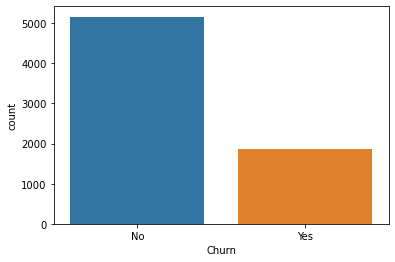

In [10]:
sns.countplot(data=df, x='Churn')

#### Task: explore the distribution of TotalCharges between Churn categories with a box plot or violin plot

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

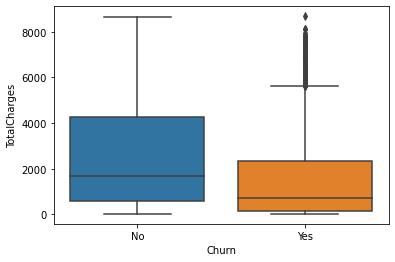

In [11]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')

#### Task: create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.

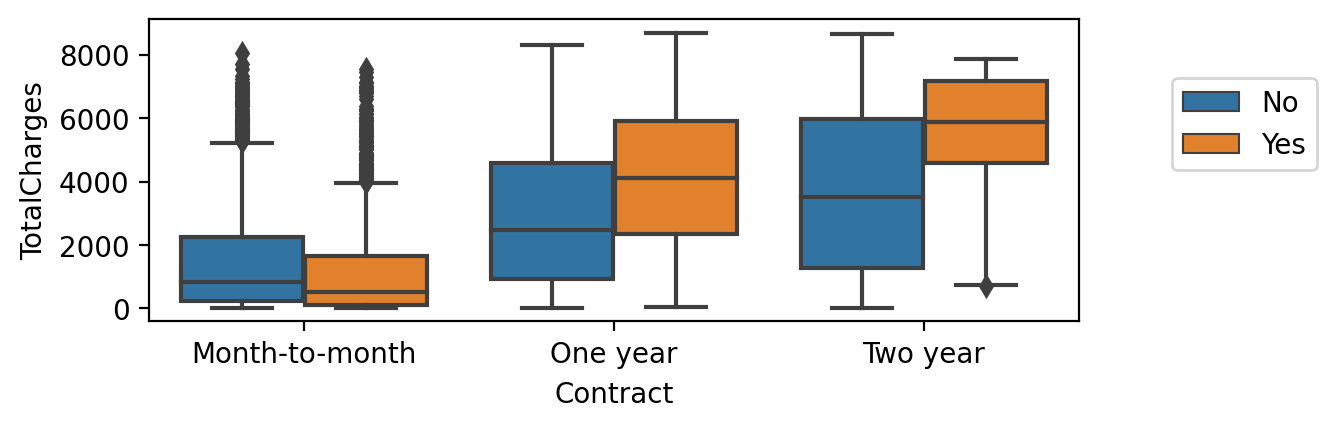

In [25]:
plt.figure(figsize=(6,2), dpi=200)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc=(1.1, 0.5))

In [29]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'InternetService', 'StreamingMovies', 'Contract', 'Churn']]).corr()

In [33]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

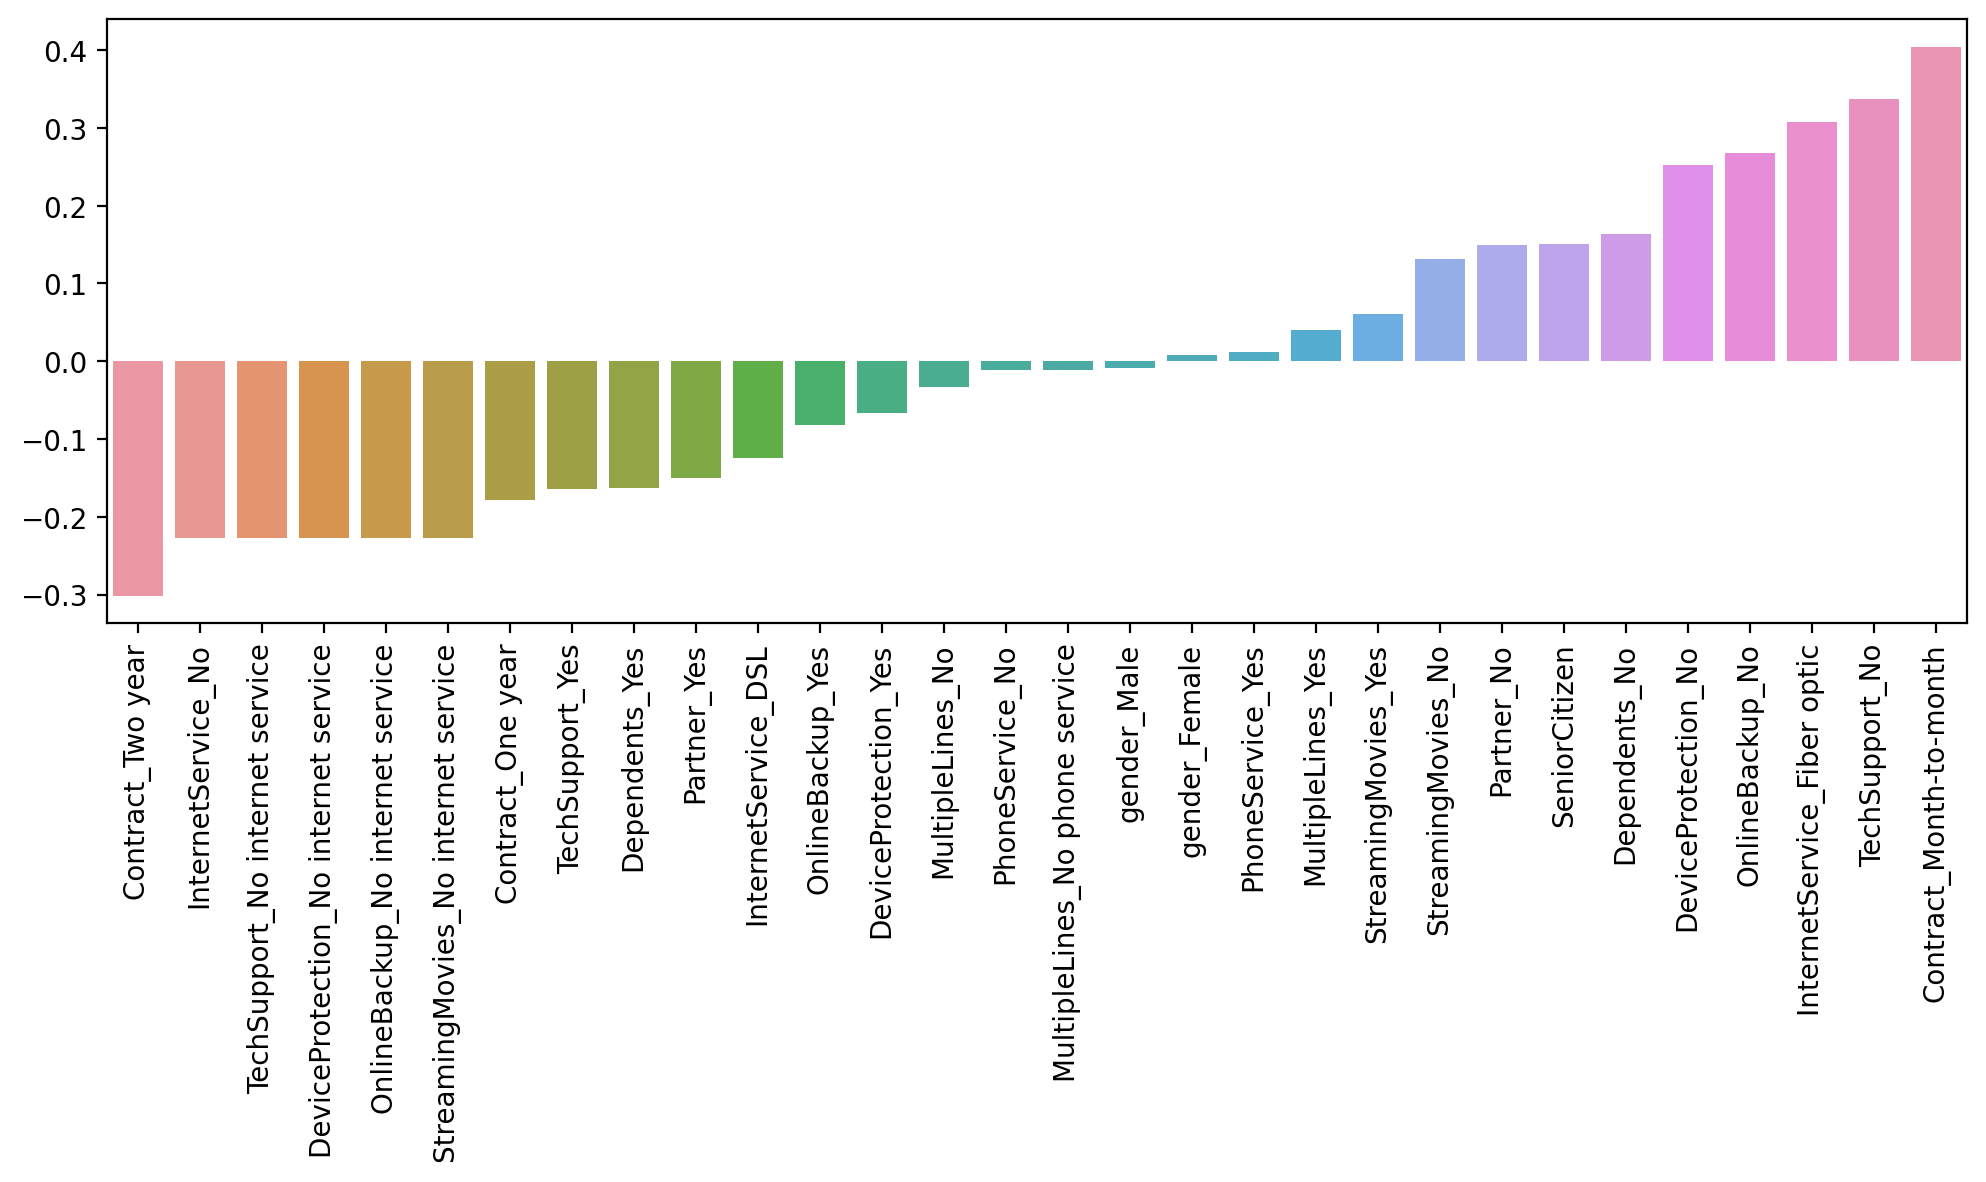

In [39]:
plt.figure(figsize=(12,4), dpi=200)
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.xticks(rotation=90);

### Part 3: Churn Analysis
This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to example differences between customer cohort segments.

#### Task: what are the 3 contract types available?

In [23]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

#### Task: create a histogram displaying the distribution of "tenure" column, which is the amount of months a customer was or has been on a customer.

<AxesSubplot:xlabel='tenure', ylabel='Count'>

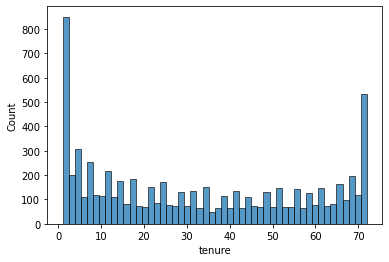

In [41]:
sns.histplot(data=df, x='tenure', bins=50)

#### Task: use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract

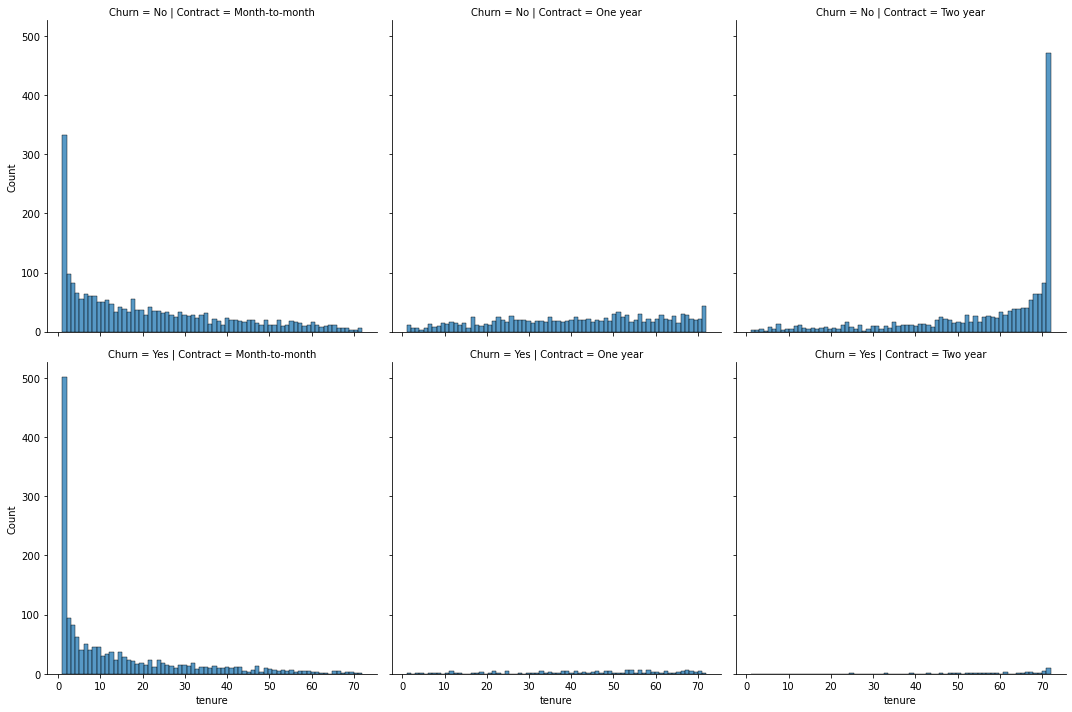

In [42]:
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')

#### Task: display a scatter plot of TotalCharges versus Monthly Charges, and color hue by Churn

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

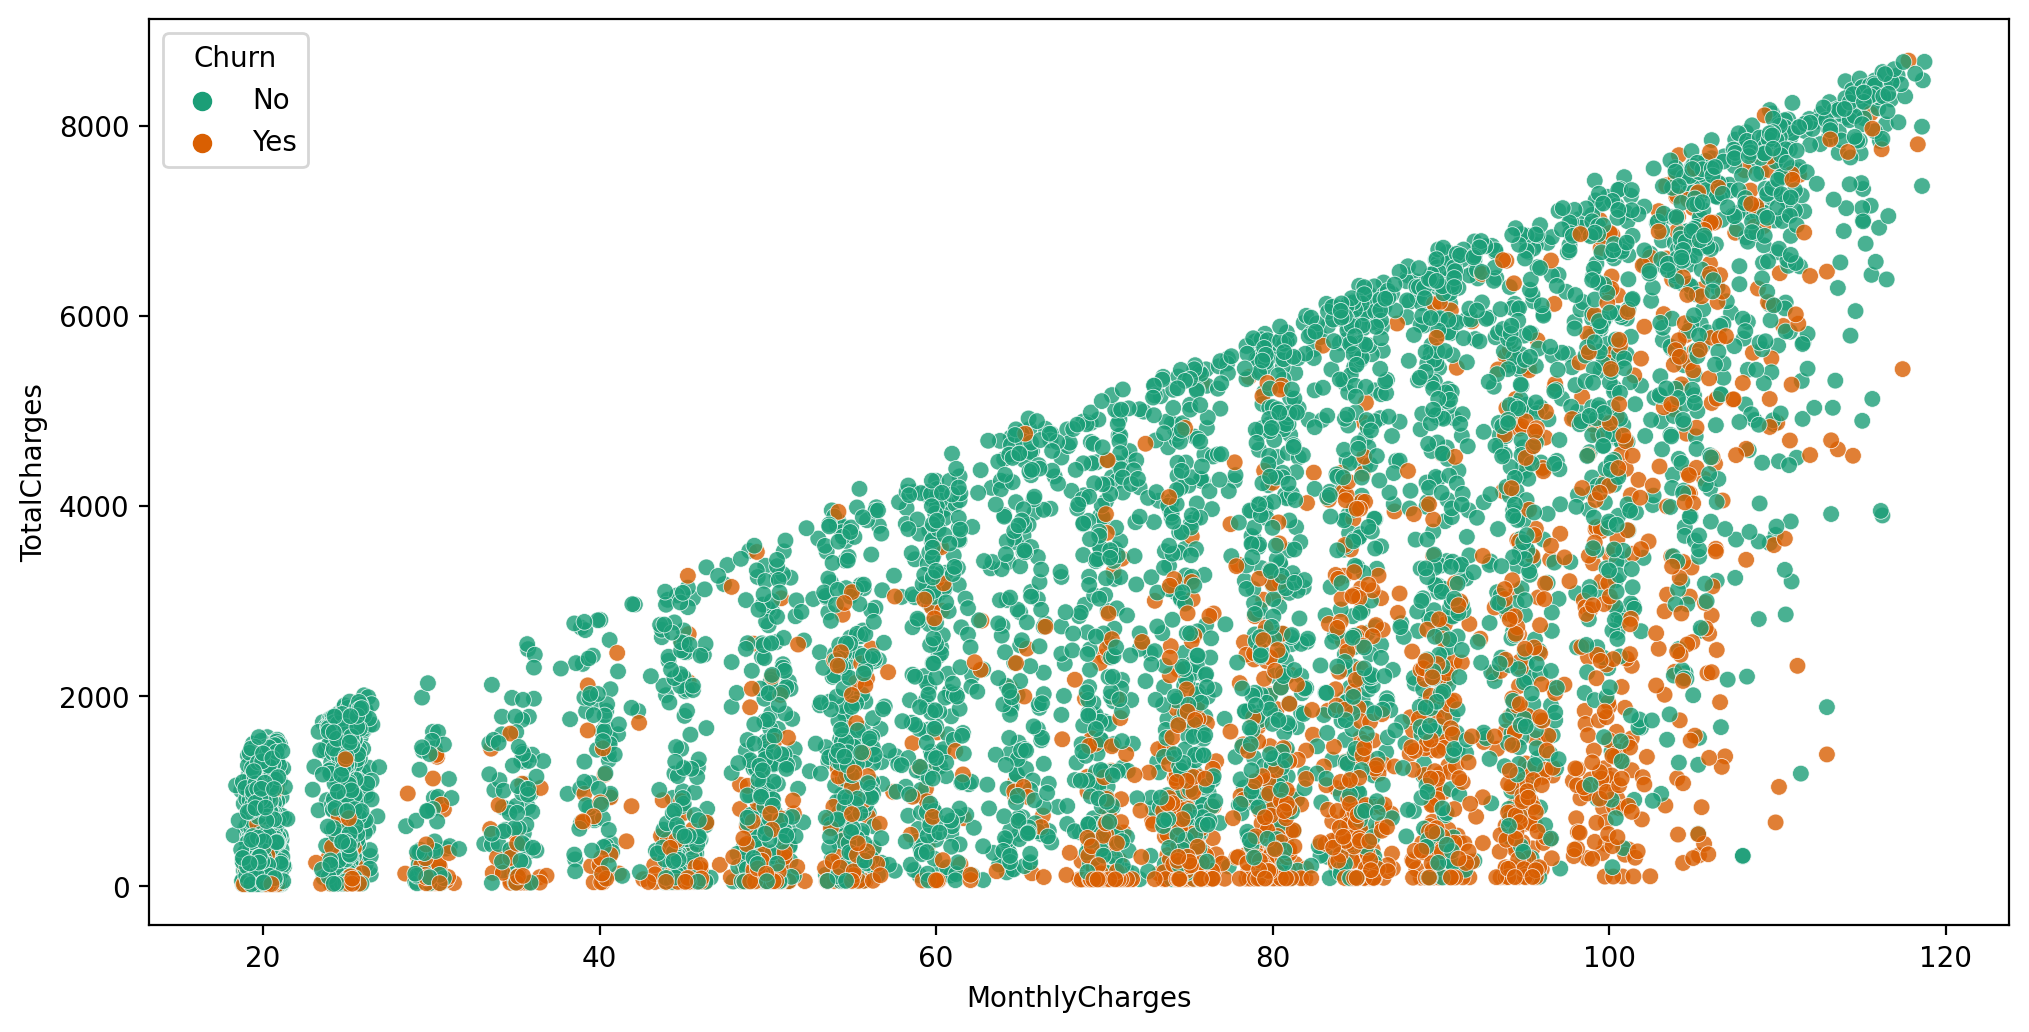

In [52]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.8, linewidth=0.3, palette='Dark2')

### Creating Cohorts based on Tenure

#### Lets begin by treating each unique tenure length, 1 month, 2 months, 3months... N months as its own cohort.

#### Task: treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. 

In [56]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [57]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)

In [61]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

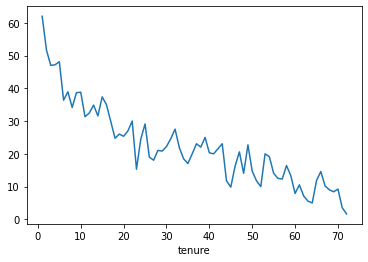

In [62]:
churn_rate.transpose()['customerID'].plot()

### Broader Cohort Groups

#### Task: based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:
    . '0-12 Months'
    . '12-24 Months'
    . '24-48 Months'
    . 'Over 48 Months'

In [63]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [64]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [66]:
df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


#### Task: Create a scatterplot of Total Charges versus Monthly Charts, colored by Tenure Cohort defined in the previous task

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

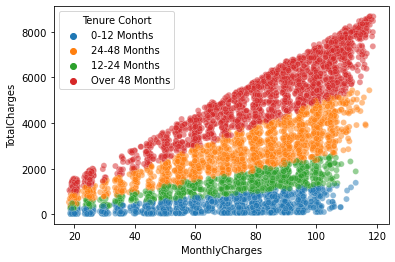

In [69]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.5, linewidth=0.3)

#### Task: create a count plot showing the churn count per cohort

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

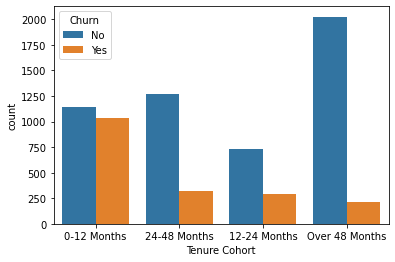

In [72]:
sns.countplot(data=df, hue='Churn', x='Tenure Cohort')

#### Task: create a grid of Count Plots showing counts per Tenure Cohort, separated out by Contract type and colored by the Churn

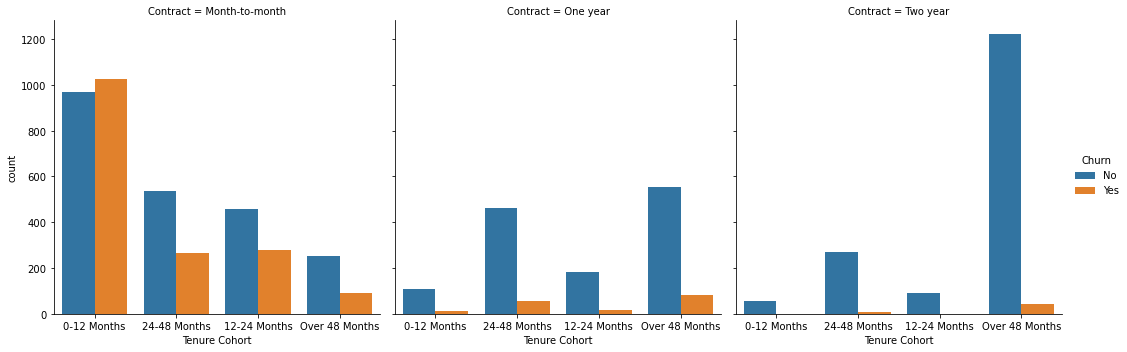

In [73]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col='Contract')

### Part 4: Predictive Modeling

#### Lets explore 4 different tree based methods. A single Decision Tree, Random Forest, AdaBoost, Gradient Boosting

### Decision Tree
#### Task: separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should b e dropped

In [74]:
X = df.drop(['Churn', 'customerID'], axis=1)

X = pd.get_dummies(X, drop_first=True)

In [75]:
y = df['Churn']

#### Task: perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#### Task: Decision Tree performace. Complete the following steps
    1. Train a single decision tree model (feel free to grid search for optimal hyperparameters)
    2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix
    3. Calculate feature importances from the decision tree
    4. OPTIONAL: plot your tree, note, the tree could be huge depending on your pruning, so it may crash 
                 your notebook display it with plot_tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [79]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [80]:
preds = dt.predict(X_test)

In [81]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



C:\Users\Jason Quach\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


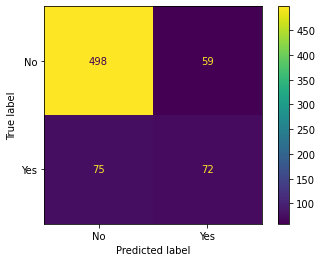

In [82]:
plot_confusion_matrix(dt, X_test, y_test)

In [84]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,
                        index=X.columns,
                        columns=['Feat Imp'])

In [88]:
imp_feats = imp_feats.sort_values('Feat Imp')

In [89]:
imp_feats = imp_feats[imp_feats['Feat Imp']>0]

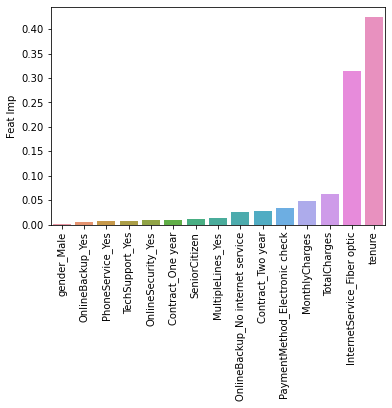

In [91]:
sns.barplot(data=imp_feats, x=imp_feats.index, y='Feat Imp')
plt.xticks(rotation=90);

In [92]:
# from sklearn.tree import plot_tree

# plot_tree(dt)

### Random Forest

#### Task: create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=6)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [99]:
preds = rf.predict(X_test)

In [100]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.59      0.45      0.51       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



C:\Users\Jason Quach\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


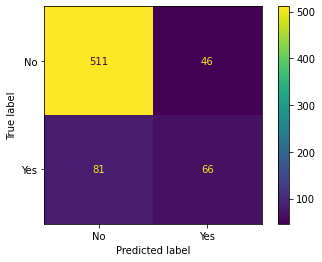

In [101]:
plot_confusion_matrix(rf, X_test, y_test)

### Boosted Trees

#### Task: use AdaBoost or Gradient Bossting to create a model and report back the classification report and plot a confusion matrix for its predicted results

In [102]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [109]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [110]:
gb_model = GradientBoostingClassifier()

In [111]:
ada_model.fit(X_train, y_train)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [112]:
ada_preds = ada_model.predict(X_test)

gb_preds = gb_model.predict(X_test)

In [113]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



C:\Users\Jason Quach\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


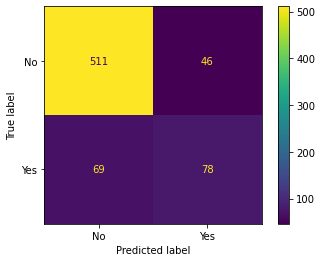

In [115]:
plot_confusion_matrix(ada_model, X_test, y_test)

In [114]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



C:\Users\Jason Quach\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


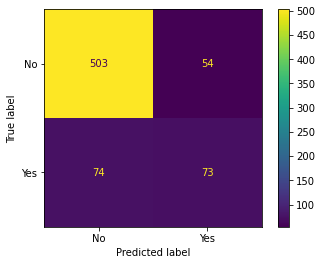

In [116]:
plot_confusion_matrix(gb_model, X_test, y_test)